## MARS TES Data analysis - Seasonal Analysis MY24 180


Date Range 

MY24 - 175

MY24 - 185

http://www-mars.lmd.jussieu.fr/mars/time/mars_date_to_earth_date.html   

### Data Mining: Beautiful Soup
We use these dates to find the orbit numbers we need the data from. For this we examine the raw files 
separately using a beautiful soup data mining program that extracts the dates and orbit numbers related to that date from the MGS mission. Once we obtain these orbit numbers, we then use the TES data tool hosted at ASU

http://tes.asu.edu/data_tool/

to extract the required files

All the relevant orbit files are concatted and saved as csv file.

The program below applies **data preprocessing** on the data from these files to obtain a cleaned set of data for the date range mentioned above


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

import seaborn as sns
import time
from datetime import datetime

# Section 1
Read all input files

1. Wavenumbers for TES are first read

2. The Theoretical NESR curve data for TES has already been extracted from the 2015 TES paper by Fonti et all and saved in a file. We read this data.

3. We read the data mentioned in the description for the required date range. This can be 

**Ls**: 175 to 185  
**Ls**: 265 to 275  
**Ls**: 355 to 5  
**Ls**: 85 to 95  

In this program we process Ls = 175 to 185. Similarly we use multiple other programs to process all other required data

In [2]:
# Wavenumber file for TES data from the NASA archive
df_wv = pd.read_csv('/scratch/pk97/TES/TES Data/Data/WAVENUMBERSS.csv', header=None)
df_wv['meanwn'] = round(df_wv.mean(axis=1),2) # Get mean of wavenumbers across 6 detectors
df_wv = df_wv.loc[0:142] #We use the first 143 channel data only
df_wv['channel'] = [str(x) for x in range(1,144)] # The channels in the file are named from 1 to 143

df_wv

,0,1,2,3,4,5,meanwn,channel
0,148.66,148.57,148.66,148.36,148.45,148.36,148.51,1
1,159.31,159.21,159.31,158.95,159.06,158.95,159.13,2
2,169.94,169.82,169.94,169.58,169.64,169.58,169.75,3
3,180.56,180.43,180.56,180.17,180.25,180.17,180.36,4
4,191.19,191.04,191.19,190.77,190.86,190.77,190.97,5
...,...,...,...,...,...,...,...,...
138,1614.25,1613.41,1614.25,1610.92,1611.88,1610.92,1612.61,139
139,1624.87,1624.05,1624.87,1621.51,1622.49,1621.51,1623.22,140
140,1635.50,1634.66,1635.50,1632.10,1633.07,1632.10,1633.82,141
141,1646.12,1645.27,1646.12,1642.70,1643.68,1642.70,1644.43,142


In [3]:
# Get methane channel column names for emissivity file
# Methane channels between wavenumbers 1200 and 1400
methane_con = (df_wv['meanwn'] >= 1200) & (df_wv['meanwn'] <= 1400)
methane_cols_wv = df_wv[methane_con]['channel'].values.flatten()
methane_cols_wv

array(['101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118'],
      dtype=object)

In [4]:
# Theoretical curve from the 2015 TES paper by Fonti et all
plot_data = pd.read_csv('/scratch/pk97/TES/TES Data/Data/plot_data.csv')
plot_data['XRound'] = round(plot_data['X'],0) # Add a column that contains rounded temperatures for future use
plot_data

,X,Y,XRound
0,202.434623,0.079619,202.0
1,202.899167,0.078271,203.0
2,203.311908,0.076959,203.0
3,203.724649,0.075648,204.0
4,204.137437,0.074364,204.0
...,...,...,...
96,301.162268,0.004574,301.0
97,302.303109,0.004481,302.0
98,303.443924,0.004373,303.0
99,304.584748,0.004270,305.0


In [5]:
# Finally read the concatted input data 
path = '/scratch/pk97/TES/TES Data/ConCat/'
filename='11_MY24180ConcatFile.csv'
df = pd.read_csv(path+filename)
df

,LONGITUDE_IAU2000,LATITUDE,ORBIT_COUNTER_KEEPER,INSTRUMENT_TIME_COUNT,INCIDENCE_ANGLE,EMISSION_ANGLE,SOLAR_LONGITUDE,LONGITUDE,LOCAL_TIME,SPACECRAFT_ALTITUDE,...,emissivity[134],emissivity[135],emissivity[136],emissivity[137],emissivity[138],emissivity[139],emissivity[140],emissivity[141],emissivity[142],emissivity[143]
0,26.009999,0.00,3329,0,139.889997,0.62,174.219996,334.259993,2.669,384,...,0.000000,-0.696747,-1.547716,2.007140,-1.510298,-0.193006,-1.992864,-1.272203,-0.123068,-4.263909
1,26.069999,0.00,3329,0,139.829997,0.50,174.219996,334.199993,2.673,384,...,-0.265238,-0.169076,-0.530409,0.681859,0.169100,-0.410861,0.229319,-0.882422,-1.111224,0.315153
2,26.129999,0.00,3329,0,139.769997,0.90,174.219996,334.139993,2.677,384,...,0.256823,-0.545807,-1.454545,0.308273,-1.623644,1.425328,-1.072133,0.077603,0.799984,-2.465088
3,26.009999,-0.05,3329,0,139.899997,0.43,174.219996,334.259993,2.669,384,...,-2.733330,1.306431,-3.805629,-1.302560,-1.841491,-3.465801,-0.135902,-0.372971,-7.011190,-0.755555
4,26.069999,-0.06,3329,0,139.839997,0.19,174.219996,334.199993,2.673,384,...,-0.500917,-1.704607,1.049358,-0.151974,0.128228,0.415234,-0.170434,-0.792735,1.122675,-4.217221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241817,356.619992,0.18,3568,3529,139.599997,0.54,185.259996,3.650000,2.690,385,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3241818,356.679992,0.18,3568,3529,139.539997,0.90,185.259996,3.590000,2.694,385,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3241819,356.559992,0.12,3568,3529,139.659997,0.45,185.259996,3.710000,2.686,385,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3241820,356.619992,0.12,3568,3529,139.599997,0.14,185.259996,3.650000,2.690,385,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# **Section :2**


Apply Preprocessing Step one
- Filter on Date required to ensure that records on the edge are filtered out
- Filter on Lat >=-60 and <=60
- Filter on time >= 11:00 <= 15:00
- Filter on emission angle >= 0 <=5
- Filter out outliers for emissivity all values in range - >= 0.05, <=1.1 

In [6]:
# Get unix time for records, unix time : 1970-1-1, TES epoch timeL: 1980-1-1
t = "1 Jan 1980 12:00:00" # unix epoch time
obj2 = time.strptime(t, "%d %b %Y %H:%M:%S") # Parse the time string
time_sec = int(time.mktime(obj2)) # Convert to struct time

df['Unix_time'] = df['SPACECRAFT_CLOCK_START_COUNT'] + time_sec # gives us the adjusted unix time

# Get unix time for the upper and lower date limit
lower_date = "22 Jul 1999 00:00:00"
obj_lower = time.strptime(lower_date, "%d %b %Y %H:%M:%S")
lower_unix_time = int(time.mktime(obj_lower))
upper_date = "9 Aug 1999 23:59:59"
obj_upper = time.strptime(upper_date, "%d %b %Y %H:%M:%S")
upper_unix_time = int(time.mktime(obj_upper))

In [7]:
# Filter out edges in Date
con_date = (df['Unix_time']>=lower_unix_time) & (df['Unix_time']<=upper_unix_time)
df = df[con_date].reset_index(drop=True)
df


,LONGITUDE_IAU2000,LATITUDE,ORBIT_COUNTER_KEEPER,INSTRUMENT_TIME_COUNT,INCIDENCE_ANGLE,EMISSION_ANGLE,SOLAR_LONGITUDE,LONGITUDE,LOCAL_TIME,SPACECRAFT_ALTITUDE,...,emissivity[135],emissivity[136],emissivity[137],emissivity[138],emissivity[139],emissivity[140],emissivity[141],emissivity[142],emissivity[143],Unix_time
0,26.009999,0.00,3329,0,139.889997,0.62,174.219996,334.259993,2.669000,384,...,-0.696747,-1.547716,2.007140,-1.510298,-0.193006,-1.992864,-1.272203,-0.123068,-4.263909,932587580
1,26.069999,0.00,3329,0,139.829997,0.50,174.219996,334.199993,2.673000,384,...,-0.169076,-0.530409,0.681859,0.169100,-0.410861,0.229319,-0.882422,-1.111224,0.315153,932587580
2,26.129999,0.00,3329,0,139.769997,0.90,174.219996,334.139993,2.677000,384,...,-0.545807,-1.454545,0.308273,-1.623644,1.425328,-1.072133,0.077603,0.799984,-2.465088,932587580
3,26.009999,-0.05,3329,0,139.899997,0.43,174.219996,334.259993,2.669000,384,...,1.306431,-3.805629,-1.302560,-1.841491,-3.465801,-0.135902,-0.372971,-7.011190,-0.755555,932587580
4,26.069999,-0.06,3329,0,139.839997,0.19,174.219996,334.199993,2.673000,384,...,-1.704607,1.049358,-0.151974,0.128228,0.415234,-0.170434,-0.792735,1.122675,-4.217221,932587580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127320,30.069999,10.45,3561,1848,41.589999,0.45,184.909996,330.199993,14.654001,390,...,0.846881,0.871073,0.866916,0.894150,0.873146,0.858406,0.875099,0.840640,0.831006,934228798
3127321,29.999999,10.45,3561,1848,41.529999,0.64,184.909996,330.269993,14.650001,390,...,0.867313,0.912172,0.858202,0.881949,0.827142,0.872875,0.834033,0.814843,0.779389,934228798
3127322,30.119999,10.52,3561,1848,41.659999,0.73,184.909996,330.149993,14.658001,390,...,0.867455,0.895806,0.886245,0.876079,0.840756,0.872041,0.870415,0.829589,0.835634,934228798
3127323,30.059999,10.51,3561,1848,41.609999,0.22,184.909996,330.209993,14.654001,390,...,0.854871,0.898263,0.878545,0.893643,0.865452,0.885481,0.867360,0.828506,0.853381,934228798


In [8]:
def set1_filters(df):
    '''Function to apply filters to Latitude, Local time & Emission Angle'''
    
    con_lat   = (df['LATITUDE']>=-60) & (df['LATITUDE']<=60)
    con_time  = (df['LOCAL_TIME'] <= 15.00) & (df['LOCAL_TIME'] >= 11.00)
    con_angle = (df['EMISSION_ANGLE']>=0) & (df['EMISSION_ANGLE']<=5)
    
    df = df[con_lat & con_time & con_angle].reset_index(drop=True)
    
    return df

In [9]:
df = set1_filters(df)
df

,LONGITUDE_IAU2000,LATITUDE,ORBIT_COUNTER_KEEPER,INSTRUMENT_TIME_COUNT,INCIDENCE_ANGLE,EMISSION_ANGLE,SOLAR_LONGITUDE,LONGITUDE,LOCAL_TIME,SPACECRAFT_ALTITUDE,...,emissivity[135],emissivity[136],emissivity[137],emissivity[138],emissivity[139],emissivity[140],emissivity[141],emissivity[142],emissivity[143],Unix_time
0,201.539996,-59.929999,3329,1162,71.729998,0.83,174.239996,158.729996,14.999001,371,...,-98.532300,-109.557545,-117.413498,-150.120488,-155.464727,-205.962790,-141.874533,-158.230627,-262.733857,932589904
1,201.529996,-59.879999,3329,1162,71.689998,0.63,174.239996,158.739996,14.998001,371,...,-84.000115,-78.067330,-114.463379,-93.127007,-107.908867,-126.895634,-129.264674,-215.883703,-154.716732,932589904
2,201.509996,-59.829999,3329,1163,71.649998,0.83,174.239996,158.759996,14.998001,371,...,-8.281713,45.739327,36.216735,19.748995,8.955427,-17.162157,24.690111,43.444746,6.245027,932589906
3,201.499996,-59.769999,3329,1163,71.609998,0.63,174.239996,158.769996,14.997001,371,...,35.520241,13.907613,-30.778146,2.557400,-1.904016,-25.683505,-38.989382,-40.478954,15.612520,932589906
4,201.479996,-59.729999,3329,1164,71.579998,0.83,174.239996,158.789996,14.996001,371,...,-22.199743,-11.910160,-75.440026,-48.313441,-46.531181,-99.079530,-87.659087,-50.859711,-72.053751,932589908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046387,30.069999,10.450000,3561,1848,41.589999,0.45,184.909996,330.199993,14.654001,390,...,0.846881,0.871073,0.866916,0.894150,0.873146,0.858406,0.875099,0.840640,0.831006,934228798
1046388,29.999999,10.450000,3561,1848,41.529999,0.64,184.909996,330.269993,14.650001,390,...,0.867313,0.912172,0.858202,0.881949,0.827142,0.872875,0.834033,0.814843,0.779389,934228798
1046389,30.119999,10.520000,3561,1848,41.659999,0.73,184.909996,330.149993,14.658001,390,...,0.867455,0.895806,0.886245,0.876079,0.840756,0.872041,0.870415,0.829589,0.835634,934228798
1046390,30.059999,10.510000,3561,1848,41.609999,0.22,184.909996,330.209993,14.654001,390,...,0.854871,0.898263,0.878545,0.893643,0.865452,0.885481,0.867360,0.828506,0.853381,934228798


In [10]:
# rename emissivity columns : ex: emissivity[1] to '1'
old_name = df.columns[df.columns.str.contains('emissivity', case=False)]
new_name = [str(x) for x in range(1,144)]

df.rename(columns=dict(zip(old_name, new_name)), inplace=True)

In [11]:
# check methane columns
df[methane_cols_wv]

,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118
0,2.936096,1.264117,1.701183,-0.774583,2.591735,1.949562,-1.471657,1.884168,0.102337,-1.548018,1.752584,-2.999406,-4.297702,-4.663919,-3.519962,-2.296318,-5.648276,-13.234942
1,0.795938,-0.180693,0.313220,1.291562,0.518576,0.069962,1.208406,0.570837,3.731937,-4.661427,1.965660,-1.999164,0.600203,-4.444503,-3.402430,-0.493123,-13.518875,-6.391425
2,1.108355,1.021279,2.153263,1.059895,0.282110,3.488713,1.989295,1.505370,-1.196973,-1.222442,-0.084392,0.808070,-1.633444,4.201999,6.138730,3.043629,0.834215,-1.910177
3,0.622789,0.438358,0.905620,4.068909,0.402287,0.893583,-0.926108,2.451317,0.677346,-2.409286,3.905932,-1.527675,0.457664,-1.740225,3.049314,5.805079,-7.971286,-4.821401
4,1.787221,2.501914,4.613682,1.958819,3.973973,5.535443,0.958605,1.541802,2.731044,3.096232,2.940517,4.094740,1.926453,6.347662,6.295997,5.610488,-1.848799,3.809593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046387,0.978295,0.984467,0.992381,0.992605,0.996769,1.005986,0.991306,0.999144,0.998718,1.004266,0.979235,0.979081,0.965336,0.960300,0.937537,0.930247,0.928102,0.940220
1046388,0.979878,0.979838,0.989007,0.988735,0.990964,0.999268,0.995012,1.010101,1.002900,1.000278,0.988567,0.975402,0.971541,0.958177,0.946634,0.929915,0.936288,0.928018
1046389,0.971576,0.987286,0.986372,1.002830,0.989915,0.995673,0.996717,0.997808,1.000019,1.004419,0.974197,0.985530,0.970928,0.954520,0.946587,0.941699,0.922289,0.935497
1046390,0.980251,0.983592,0.998139,0.993026,0.995833,1.002430,1.000903,0.994645,0.996471,1.005669,0.988702,0.978418,0.960140,0.960742,0.948211,0.929098,0.934842,0.935490


In [12]:
# Emissivity threshold checks
max_thresh = 1.1
min_thresh = 0.05

emis_cols = [str(x) for x in range(6, 134)] # leave out first 5 and last 10 channels

con_emiss = (df[emis_cols] >= max_thresh).any(axis=1) | (df[emis_cols] <= min_thresh).any(axis=1)
#df[~con_emiss]
df = df[~con_emiss].reset_index(drop=True)

df

,LONGITUDE_IAU2000,LATITUDE,ORBIT_COUNTER_KEEPER,INSTRUMENT_TIME_COUNT,INCIDENCE_ANGLE,EMISSION_ANGLE,SOLAR_LONGITUDE,LONGITUDE,LOCAL_TIME,SPACECRAFT_ALTITUDE,...,135,136,137,138,139,140,141,142,143,Unix_time
0,200.029996,-52.959999,3329,1229,66.739999,0.53,174.239996,160.239996,14.935001,371,...,0.603259,0.540173,0.815371,0.578718,0.680441,0.486891,0.774900,0.779120,0.720268,932590038
1,199.759996,-52.619999,3329,1233,66.409999,0.83,174.239996,160.509996,14.919001,371,...,0.594131,0.666349,0.750426,0.478668,0.665832,0.640283,0.689648,0.393871,0.329693,932590046
2,199.939996,-52.549999,3329,1233,66.449999,0.54,174.239996,160.329996,14.931001,371,...,0.629283,0.864202,0.801839,0.832299,0.917283,0.578848,0.463555,0.933758,0.655579,932590046
3,199.739996,-52.519999,3329,1234,66.339999,0.83,174.239996,160.529996,14.918001,371,...,0.991209,0.967791,0.952973,1.053890,0.765014,0.877514,1.088190,1.102466,0.779544,932590048
4,199.809996,-52.409999,3329,1235,66.299999,0.54,174.239996,160.459996,14.924001,371,...,0.840723,0.983585,1.007413,0.917450,0.822715,1.049025,0.660453,0.943999,0.539193,932590050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712035,30.129999,10.460000,3561,1848,41.649999,0.83,184.909996,330.139993,14.658001,390,...,0.870240,0.869175,0.860788,0.861210,0.898863,0.894682,0.833443,0.859804,0.836722,934228798
712036,29.999999,10.450000,3561,1848,41.529999,0.64,184.909996,330.269993,14.650001,390,...,0.867313,0.912172,0.858202,0.881949,0.827142,0.872875,0.834033,0.814843,0.779389,934228798
712037,30.119999,10.520000,3561,1848,41.659999,0.73,184.909996,330.149993,14.658001,390,...,0.867455,0.895806,0.886245,0.876079,0.840756,0.872041,0.870415,0.829589,0.835634,934228798
712038,30.059999,10.510000,3561,1848,41.609999,0.22,184.909996,330.209993,14.654001,390,...,0.854871,0.898263,0.878545,0.893643,0.865452,0.885481,0.867360,0.828506,0.853381,934228798


In [13]:
# save file to do clustering before noise: only for My 24 Ls 180
#df.to_csv('Data/116_MY24180_BeforeNoise.csv', index=False)

# **Section :3**

Apply Preprocessing Steps 
- Calculate Ripple Factor defined in the paper
- Eliminate records with ripple factor lower and upper limit
- Perform Noise filtering as defined in the tes paper 2010
- Store the Noise Calculated File for processing Noise and Temperature Cutoffs

In [14]:
# Ripple factor 
# calculate sum of odd and even channels in the methane band 1200 - 1400 wavenumber

df['E_Even'] = df['102'] + df['104'] +\
               df['106'] + df['108'] + df['110'] + df['112'] + df['114'] + df['116'] + \
               df['118'] 

df['E_Odd'] = df['101'] + df['103'] +\
              df['105'] + df['107'] + df['109'] + df['111'] + df['113'] + df['115'] + \
              df['117'] 

df['Ripple'] = df['E_Even'] / df['E_Odd']

ripple_lower = round(df['Ripple'].mean(),2)-0.01
ripple_upper = round(df['Ripple'].mean(),2)+0.01 
print(ripple_lower, ripple_upper)

condition = (df['Ripple'] < ripple_lower) |  (df['Ripple'] > ripple_upper)
df[~condition].copy().reset_index(drop=True)

0.99 1.01


,LONGITUDE_IAU2000,LATITUDE,ORBIT_COUNTER_KEEPER,INSTRUMENT_TIME_COUNT,INCIDENCE_ANGLE,EMISSION_ANGLE,SOLAR_LONGITUDE,LONGITUDE,LOCAL_TIME,SPACECRAFT_ALTITUDE,...,138,139,140,141,142,143,Unix_time,E_Even,E_Odd,Ripple
0,200.029996,-52.959999,3329,1229,66.739999,0.53,174.239996,160.239996,14.935001,371,...,0.578718,0.680441,0.486891,0.774900,0.779120,0.720268,932590038,9.218786,9.149036,1.007624
1,199.779996,-52.249999,3329,1236,66.189999,0.06,174.239996,160.489996,14.922001,371,...,1.091365,0.770237,0.663012,0.878864,0.880991,0.795130,932590052,9.105953,9.100069,1.000647
2,199.689996,-52.249999,3329,1236,66.149999,0.62,174.239996,160.579996,14.916001,371,...,1.205724,0.976189,0.664076,1.057795,0.526410,0.501027,932590052,9.129698,9.068346,1.006765
3,199.759996,-52.139999,3329,1237,66.119999,0.06,174.239996,160.509996,14.921001,371,...,0.852957,0.686117,0.726799,0.359789,0.635410,0.394538,932590054,8.604316,8.660006,0.993569
4,199.669996,-52.149999,3329,1237,66.079999,0.62,174.239996,160.599996,14.915001,371,...,0.543646,0.539347,0.729026,0.704301,0.345483,0.456839,932590054,8.669141,8.708380,0.995494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648964,30.129999,10.460000,3561,1848,41.649999,0.83,184.909996,330.139993,14.658001,390,...,0.861210,0.898863,0.894682,0.833443,0.859804,0.836722,934228798,8.766521,8.762546,1.000454
648965,29.999999,10.450000,3561,1848,41.529999,0.64,184.909996,330.269993,14.650001,390,...,0.881949,0.827142,0.872875,0.834033,0.814843,0.779389,934228798,8.769731,8.800791,0.996471
648966,30.119999,10.520000,3561,1848,41.659999,0.73,184.909996,330.149993,14.658001,390,...,0.876079,0.840756,0.872041,0.870415,0.829589,0.835634,934228798,8.805261,8.758600,1.005328
648967,30.059999,10.510000,3561,1848,41.609999,0.22,184.909996,330.209993,14.654001,390,...,0.893643,0.865452,0.885481,0.867360,0.828506,0.853381,934228798,8.783109,8.803492,0.997685


(0.9, 1.1)

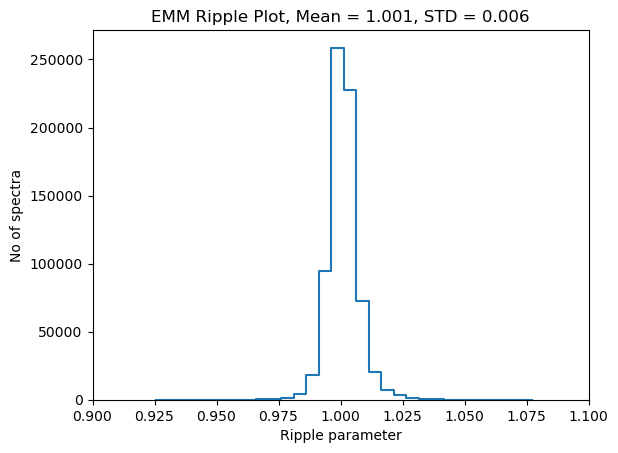

In [15]:
# Plot the ripple
sns.histplot(df['Ripple'],element = 'step', fill = False, binwidth = 0.005)
plt.xlabel('Ripple parameter')
plt.ylabel('No of spectra')
title = 'EMM Ripple Plot, Mean = %.3f, STD = %.3f'%(df['Ripple'].mean(), df['Ripple'].std())
plt.title(title)
plt.xlim(0.9,1.1)

In [16]:
df = df[~condition].copy().reset_index(drop=True) # Filter Ripple
df

,LONGITUDE_IAU2000,LATITUDE,ORBIT_COUNTER_KEEPER,INSTRUMENT_TIME_COUNT,INCIDENCE_ANGLE,EMISSION_ANGLE,SOLAR_LONGITUDE,LONGITUDE,LOCAL_TIME,SPACECRAFT_ALTITUDE,...,138,139,140,141,142,143,Unix_time,E_Even,E_Odd,Ripple
0,200.029996,-52.959999,3329,1229,66.739999,0.53,174.239996,160.239996,14.935001,371,...,0.578718,0.680441,0.486891,0.774900,0.779120,0.720268,932590038,9.218786,9.149036,1.007624
1,199.779996,-52.249999,3329,1236,66.189999,0.06,174.239996,160.489996,14.922001,371,...,1.091365,0.770237,0.663012,0.878864,0.880991,0.795130,932590052,9.105953,9.100069,1.000647
2,199.689996,-52.249999,3329,1236,66.149999,0.62,174.239996,160.579996,14.916001,371,...,1.205724,0.976189,0.664076,1.057795,0.526410,0.501027,932590052,9.129698,9.068346,1.006765
3,199.759996,-52.139999,3329,1237,66.119999,0.06,174.239996,160.509996,14.921001,371,...,0.852957,0.686117,0.726799,0.359789,0.635410,0.394538,932590054,8.604316,8.660006,0.993569
4,199.669996,-52.149999,3329,1237,66.079999,0.62,174.239996,160.599996,14.915001,371,...,0.543646,0.539347,0.729026,0.704301,0.345483,0.456839,932590054,8.669141,8.708380,0.995494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648964,30.129999,10.460000,3561,1848,41.649999,0.83,184.909996,330.139993,14.658001,390,...,0.861210,0.898863,0.894682,0.833443,0.859804,0.836722,934228798,8.766521,8.762546,1.000454
648965,29.999999,10.450000,3561,1848,41.529999,0.64,184.909996,330.269993,14.650001,390,...,0.881949,0.827142,0.872875,0.834033,0.814843,0.779389,934228798,8.769731,8.800791,0.996471
648966,30.119999,10.520000,3561,1848,41.659999,0.73,184.909996,330.149993,14.658001,390,...,0.876079,0.840756,0.872041,0.870415,0.829589,0.835634,934228798,8.805261,8.758600,1.005328
648967,30.059999,10.510000,3561,1848,41.609999,0.22,184.909996,330.209993,14.654001,390,...,0.893643,0.865452,0.885481,0.867360,0.828506,0.853381,934228798,8.783109,8.803492,0.997685


In [17]:
# for the next step we need 2 sets of columns
# 1. Diff1 = Difference from Mean
# 2. Linfit = Linear Fit of Difference 1
# 3. Diff2 = Difference of Diff1 & the Lin fit


emiss_mean = df[methane_cols_wv].mean() # Let's get the mean of emissivities for the methane channels
emiss_mean

101    0.972877
102    0.982235
103    0.985712
104    0.987691
105    0.985338
106    0.994099
107    0.991513
108    0.995785
109    1.000725
110    1.001432
111    0.993051
112    0.986171
113    0.976242
114    0.964549
115    0.952658
116    0.950085
117    0.943125
118    0.944718
dtype: float64

In [18]:
# Names of the new columns
cols_diff1 = [x+'_D1' for x in methane_cols_wv]
cols_linfit = [x+'_L1' for x in methane_cols_wv]
cols_diff2 = [x+'_D2' for x in methane_cols_wv]

print('\033[1mbdiff1 cols -\033[0m',cols_diff1)
print('\033[1mlinfit cols -\033[0m',cols_linfit)
print('\033[1mdiff2 cols -\033[0m',cols_diff2)

bdiff1 cols - ['101_D1', '102_D1', '103_D1', '104_D1', '105_D1', '106_D1', '107_D1', '108_D1', '109_D1', '110_D1', '111_D1', '112_D1', '113_D1', '114_D1', '115_D1', '116_D1', '117_D1', '118_D1']
linfit cols - ['101_L1', '102_L1', '103_L1', '104_L1', '105_L1', '106_L1', '107_L1', '108_L1', '109_L1', '110_L1', '111_L1', '112_L1', '113_L1', '114_L1', '115_L1', '116_L1', '117_L1', '118_L1']
diff2 cols - ['101_D2', '102_D2', '103_D2', '104_D2', '105_D2', '106_D2', '107_D2', '108_D2', '109_D2', '110_D2', '111_D2', '112_D2', '113_D2', '114_D2', '115_D2', '116_D2', '117_D2', '118_D2']


In [19]:
df[cols_diff1] = df[methane_cols_wv] - emiss_mean # Difference 1
df[cols_diff1] 

,101_D1,102_D1,103_D1,104_D1,105_D1,106_D1,107_D1,108_D1,109_D1,110_D1,111_D1,112_D1,113_D1,114_D1,115_D1,116_D1,117_D1,118_D1
0,0.012201,0.037431,0.016287,0.027356,0.030380,0.067580,0.079758,0.047761,0.073632,0.045785,0.039677,0.093997,0.000138,0.054205,0.106925,-0.004492,-0.011202,0.042397
1,0.015338,-0.006094,0.001841,0.022777,0.013928,0.017678,0.013896,0.051683,0.035884,0.076471,0.072981,0.081679,0.068299,-0.037944,0.084513,0.020877,-0.007852,0.072060
2,0.023122,-0.035270,0.004574,0.008930,0.014052,-0.005334,-0.001492,0.055928,0.035814,0.077087,0.088778,0.067506,0.097408,0.037197,0.013698,0.111656,-0.008847,0.005231
3,-0.020375,-0.070488,-0.061889,-0.041655,-0.050247,0.013328,-0.072435,0.029745,-0.005464,-0.043370,-0.021462,0.037925,0.057602,-0.001245,0.090070,-0.103838,-0.057034,-0.022852
4,-0.012788,-0.053256,-0.044950,-0.003198,-0.016116,-0.016246,-0.009335,0.004224,0.007767,-0.044770,0.011838,-0.007646,0.046305,0.049741,0.037436,-0.000320,-0.113017,-0.066154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648964,0.006886,0.008345,0.002083,0.006966,0.004284,0.006534,0.012604,0.009770,-0.002188,-0.007002,-0.005280,-0.008123,-0.015823,-0.017306,-0.017403,-0.013421,-0.023856,-0.026006
648965,0.007002,-0.002397,0.003295,0.001044,0.005626,0.005168,0.003499,0.014315,0.002175,-0.001154,-0.004484,-0.010769,-0.004701,-0.006372,-0.006023,-0.020171,-0.006837,-0.016699
648966,-0.001300,0.005051,0.000660,0.015139,0.004577,0.001574,0.005205,0.002022,-0.000706,0.002987,-0.018854,-0.000641,-0.005314,-0.010029,-0.006071,-0.008386,-0.020837,-0.009221
648967,0.007375,0.001357,0.012427,0.005336,0.010495,0.008331,0.009391,-0.001141,-0.004254,0.004238,-0.004349,-0.007753,-0.016102,-0.003808,-0.004447,-0.020988,-0.008284,-0.009228


In [20]:
def predict_linfit(y_arr, x):
    '''
    dataframe y_arr: columns containing the difference 1 converted to numpy
    x: the np array containing the wavenumbers which form the x values
    A: the np array that contains x with 1s
    y_columns: are the columns that contain our Y values, in this case - diff1
    ypred_columns: the colums where we store the linear fit pred values'''

    # Initialise the  arrays required for calculations
    predictions = np.zeros_like(y_arr)

    for i in range(0,  len(y_arr)):
        Y = y_arr[i]
    #    try:    
        a, b = np.polyfit(x, Y, 1)
    #    except:
    #        print(i)
        # calculate the linear fit line for row i 
        # store in output array
        predictions[i,0:predictions.shape[1]] = a*x + b
    
    return predictions 

In [21]:
# Calculate linear fit line of Difference 1

y_arr = df[cols_diff1].to_numpy()
x = np.array([float(x) for x in methane_cols_wv])

df[cols_linfit] = predict_linfit(y_arr, x)
df[cols_linfit]

,101_L1,102_L1,103_L1,104_L1,105_L1,106_L1,107_L1,108_L1,109_L1,110_L1,111_L1,112_L1,113_L1,114_L1,115_L1,116_L1,117_L1,118_L1
0,0.040893,0.041048,0.041203,0.041358,0.041514,0.041669,0.041824,0.041979,0.042134,0.042290,0.042445,0.042600,0.042755,0.042911,0.043066,0.043221,0.043376,0.043531
1,0.013965,0.016231,0.018497,0.020762,0.023028,0.025293,0.027559,0.029825,0.032090,0.034356,0.036622,0.038887,0.041153,0.043418,0.045684,0.047950,0.050215,0.052481
2,0.006911,0.009955,0.012998,0.016041,0.019085,0.022128,0.025171,0.028215,0.031258,0.034302,0.037345,0.040388,0.043432,0.046475,0.049518,0.052562,0.055605,0.058649
3,-0.038168,-0.035924,-0.033680,-0.031436,-0.029192,-0.026948,-0.024704,-0.022460,-0.020216,-0.017971,-0.015727,-0.013483,-0.011239,-0.008995,-0.006751,-0.004507,-0.002263,-0.000019
4,-0.014847,-0.014607,-0.014367,-0.014126,-0.013886,-0.013646,-0.013405,-0.013165,-0.012925,-0.012685,-0.012444,-0.012204,-0.011964,-0.011723,-0.011483,-0.011243,-0.011002,-0.010762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648964,0.013300,0.011220,0.009139,0.007058,0.004978,0.002897,0.000816,-0.001264,-0.003345,-0.005426,-0.007506,-0.009587,-0.011668,-0.013749,-0.015829,-0.017910,-0.019991,-0.022071
648965,0.008097,0.006899,0.005702,0.004504,0.003307,0.002109,0.000912,-0.000286,-0.001484,-0.002681,-0.003879,-0.005076,-0.006274,-0.007471,-0.008669,-0.009867,-0.011064,-0.012262
648966,0.007563,0.006384,0.005206,0.004028,0.002850,0.001671,0.000493,-0.000685,-0.001863,-0.003042,-0.004220,-0.005398,-0.006576,-0.007755,-0.008933,-0.010111,-0.011289,-0.012467
648967,0.010701,0.009302,0.007903,0.006504,0.005106,0.003707,0.002308,0.000909,-0.000490,-0.001889,-0.003287,-0.004686,-0.006085,-0.007484,-0.008883,-0.010281,-0.011680,-0.013079


In [22]:
# Calculate Difference 2 
for i in range(len(cols_linfit)):
    df[cols_diff2[i]] = df[cols_diff1[i]] - df[cols_linfit[i]]
df[cols_diff2]

,101_D2,102_D2,103_D2,104_D2,105_D2,106_D2,107_D2,108_D2,109_D2,110_D2,111_D2,112_D2,113_D2,114_D2,115_D2,116_D2,117_D2,118_D2
0,-0.028692,-0.003617,-0.024916,-0.014002,-0.011134,0.025911,0.037934,0.005782,0.031498,0.003496,-0.002768,0.051397,-0.042618,0.011295,0.063860,-0.047713,-0.054579,-0.001134
1,0.001373,-0.022325,-0.016656,0.002015,-0.009100,-0.007616,-0.013663,0.021859,0.003794,0.042115,0.036360,0.042792,0.027146,-0.081362,0.038829,-0.027073,-0.058067,0.019579
2,0.016211,-0.045224,-0.008424,-0.007111,-0.005033,-0.027462,-0.026664,0.027713,0.004556,0.042786,0.051433,0.027118,0.053977,-0.009278,-0.035820,0.059095,-0.064453,-0.053418
3,0.017793,-0.034564,-0.028209,-0.010219,-0.021055,0.040276,-0.047732,0.052205,0.014752,-0.025398,-0.005734,0.051408,0.068841,0.007750,0.096821,-0.099332,-0.054771,-0.022833
4,0.002060,-0.038649,-0.030583,0.010928,-0.002230,-0.002600,0.004071,0.017389,0.020691,-0.032085,0.024282,0.004558,0.058268,0.061465,0.048919,0.010923,-0.102014,-0.055392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648964,-0.006414,-0.002875,-0.007056,-0.000092,-0.000694,0.003637,0.011787,0.011035,0.001157,-0.001577,0.002227,0.001464,-0.004156,-0.003558,-0.001573,0.004489,-0.003865,-0.003935
648965,-0.001095,-0.009297,-0.002407,-0.003460,0.002319,0.003059,0.002588,0.014601,0.003658,0.001527,-0.000605,-0.005693,0.001573,0.001099,0.002646,-0.010304,0.004227,-0.004438
648966,-0.008863,-0.001334,-0.004546,0.011112,0.001727,-0.000097,0.004712,0.002707,0.001157,0.006029,-0.014634,0.004757,0.001263,-0.002275,0.002862,0.001725,-0.009547,0.003247
648967,-0.003326,-0.007945,0.004524,-0.001169,0.005390,0.004624,0.007083,-0.002050,-0.003764,0.006126,-0.001062,-0.003067,-0.010017,0.003676,0.004436,-0.010706,0.003397,0.003851


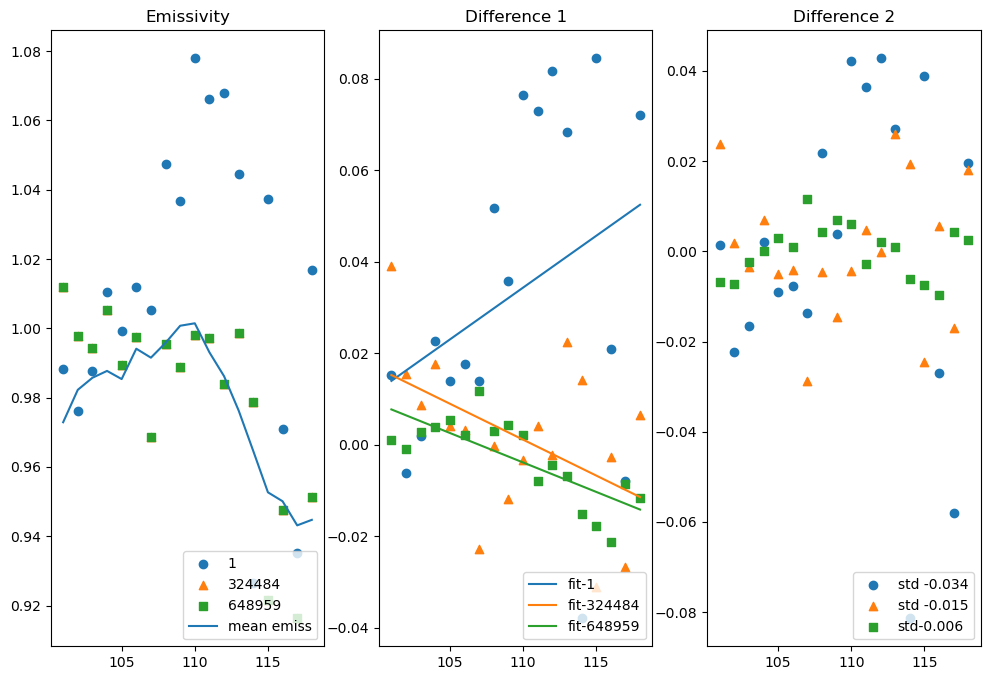

In [23]:
# plot all the differences as scatter
row1 = 1
row2 = int(len(df)/2)
row3 = len(df) - 10

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))
#fig.suptitle('Horizontally stacked subplots')

# plot the scatter of the emissivities
ax1.scatter(x, df.loc[row1:row1][methane_cols_wv].values.flatten(), label=str(row1), marker='o')
ax1.scatter(x, df.loc[row2:row2][methane_cols_wv].values.flatten(), label=str(row2), marker='^')
ax1.scatter(x, df.loc[row2:row2][methane_cols_wv].values.flatten(), label=str(row3), marker='s')

# plot the mean emissivity line
ax1.plot(x, emiss_mean, label='mean emiss')
ax1.set_title('Emissivity')
ax1.legend(loc='lower right')

# plot the differences

ax2.scatter(x, df.loc[row1:row1][cols_diff1].values.flatten(), marker='o')
ax2.scatter(x, df.loc[row2:row2][cols_diff1].values.flatten(), marker='^')
ax2.scatter(x, df.loc[row3:row3][cols_diff1].values.flatten(), marker='s')

# plot the linear fit

ax2.plot(x, df.loc[row1:row1][cols_linfit].values.flatten(), label='fit-'+str(row1) )
ax2.plot(x, df.loc[row2:row2][cols_linfit].values.flatten(), label='fit-'+str(row2) )
ax2.plot(x, df.loc[row3:row3][cols_linfit].values.flatten(), label='fit-'+str(row3) )

ax2.set_title('Difference 1')
ax2.legend(loc='lower right')
# plot the differences 2

std1 = round(df.loc[row1:row1][cols_diff2].std(axis=1)[row1],3)
std2 =  round(df.loc[row2:row2][cols_diff2].std(axis=1)[row2], 3)
std3 = round(df.loc[row3:row3][cols_diff2].std(axis=1)[row3],3)

ax3.scatter(x, df.loc[row1:row1][cols_diff2].values.flatten(), label='std -'+str(std1), marker='o')
ax3.scatter(x, df.loc[row2:row2][cols_diff2].values.flatten(), label='std -'+str(std2), marker='^')
ax3.scatter(x, df.loc[row3:row3][cols_diff2].values.flatten(), label='std-'+str(std3), marker='s')

ax3.set_title('Difference 2')
ax3.legend(loc='lower right')

#plt.ylim([-0.2, 1.1])
#plt.plot(x, df.loc[0:0][cols_diff2].values.flatten(), label='diff2' )



#ax2.legend()

In [24]:
# Calculate the noise - Standard deviation of the diff2 

# Calculate the standard deviation of difference 2
#df_noise.iloc[:, 210:228]
df['std_2'] = df[cols_diff2].std(axis=1)
df['std_2']

0         0.033302
1         0.034197
2         0.038119
3         0.048858
4         0.040665
            ...   
648964    0.005244
648965    0.005651
648966    0.006189
648967    0.005623
648968    0.005087
Name: std_2, Length: 648969, dtype: float64

In [37]:
# Store the cleaned file for further analysis
path = 'Data/'
filename = '116_MY180_NoiseCalculated.csv'
df.to_csv(path+filename, index=False)